<a href="https://colab.research.google.com/github/Fpannunzio/SIA-TPs/blob/main/TP4/EjercicioPrimeraComponente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Config

In [ ]:
import pandas
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
europe = pandas.read_csv('https://raw.githubusercontent.com/Fpannunzio/SIA-TPs/master/TP4/europe.csv')

In [ ]:
# BiPlot: https://sukhbinder.wordpress.com/2015/08/05/biplot-with-python/
# Labels: https://towardsdatascience.com/how-to-add-text-labels-to-scatterplot-in-matplotlib-seaborn-ec5df6afed7a
def biplot(score,coeff,pcax,pcay,df,labels=None):
    plt.figure(figsize=(16,10))
    pca1=pcax-1
    pca2=pcay-1
    xs = score[:,pca1]
    ys = score[:,pca2]
    n=score.shape[1]
    scalex = 1.0/(xs.max()- xs.min())
    scaley = 1.0/(ys.max()- ys.min())
    plt.scatter(xs*scalex,ys*scaley)

    # Arrows and labels
    for i in range(n):
        plt.arrow(0, 0, coeff[pca1, i], coeff[pca2, i],color='r',alpha=0.5) 
        plt.text(coeff[pca1,i]* 1.15, coeff[pca2,i] * 1.15, labels[i], color='g', ha='center', va='center')

    # Countries labels
    for i in range(df.shape[0]):
        plt.text(xs[i]*scalex*1.05, ys[i]*scaley*1.05, s=df.values[i, 0], 
        fontdict=dict(color='red',size=10),
        bbox=dict(facecolor='yellow',alpha=0.5))

    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(pcax))
    plt.ylabel("PC{}".format(pcay))
    plt.grid()

# Datos sin normalizar

Calculo de las componentes principales sin normalizar la informacion, GDP y Area que tienen valores muy grandes pisan por completo a las demas variables.

In [ ]:
std_values = europe.values[:, 1:]
pca = PCA().fit(std_values)

In [ ]:
pc = pandas.DataFrame(data=pca.components_, columns=europe.columns.values[1:]).head(2)
pc_title = pandas.DataFrame(data=[['PC1'], ['PC2']], columns=['PC'])

pandas.concat([pc_title, pc], axis = 1)

,PC,Area,GDP,Inflation,Life.expect,Military,Pop.growth,Unemployment
0,PC1,0.999925,-0.012226,0.000003,-4.318611e-07,4.936399e-07,-2.711353e-07,7.349659e-07
1,PC2,0.012226,0.999925,-0.000044,1.565008e-04,-1.522774e-05,2.640108e-05,-1.724103e-04


In [ ]:
pc_av = pandas.DataFrame(data=pca.explained_variance_, columns=['Auto Valor']).head(2)
pc_v = pandas.DataFrame(data=pca.explained_variance_ratio_, columns=['Variabilidad']).head(2)
pc_title = pandas.DataFrame(data=[['PC1'], ['PC2']], columns=['PC'])

pandas.concat([pc_title, pc_av, pc_v], axis = 1)

,PC,Auto Valor,Variabilidad
0,PC1,2.740712e+10,0.992531
1,PC2,2.062455e+08,0.007469


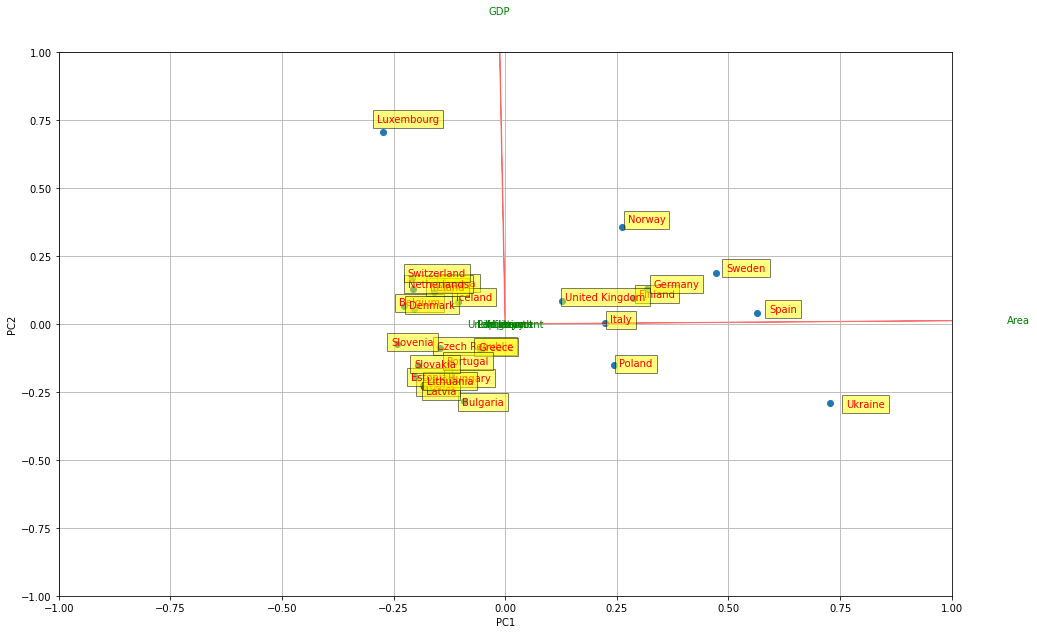

In [ ]:
score = pca.transform(std_values)
biplot(score, pca.components_, 1, 2, europe,labels=europe.columns.values[1:])

# Datos normalizados

In [ ]:
std_values = StandardScaler().fit_transform(europe.values[:, 1:])
pca = PCA().fit(std_values)

In [ ]:
pc = pandas.DataFrame(data=pca.components_, columns=europe.columns.values[1:]).head(2)
pc_title = pandas.DataFrame(data=[['PC1'], ['PC2']], columns=['PC'])

pandas.concat([pc_title, pc], axis = 1)

,PC,Area,GDP,Inflation,Life.expect,Military,Pop.growth,Unemployment
0,PC1,0.124874,-0.500506,0.406518,-0.482873,0.188112,-0.475704,0.271656
1,PC2,-0.172872,-0.130140,-0.369657,0.265248,0.658267,0.082622,0.553204


In [ ]:
pc_av = pandas.DataFrame(data=pca.explained_variance_, columns=['Auto Valor']).head(2)
pc_v = pandas.DataFrame(data=pca.explained_variance_ratio_, columns=['Variabilidad']).head(2)
pc_title = pandas.DataFrame(data=[['PC1'], ['PC2']], columns=['PC'])

pandas.concat([pc_title, pc_av, pc_v], axis = 1)

,PC,Auto Valor,Ratio
0,PC1,3.346690,0.461024
1,PC2,1.231091,0.169589


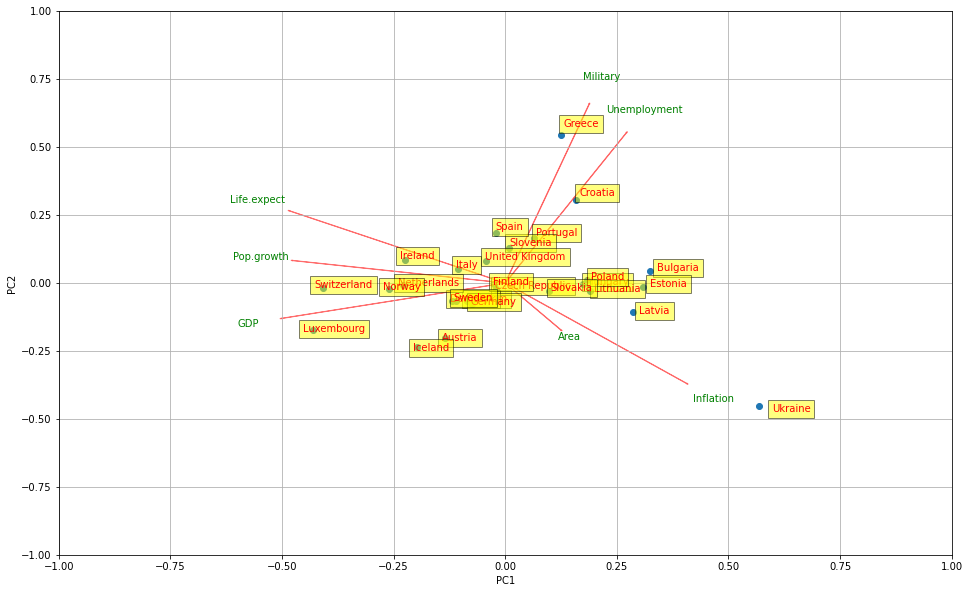

In [ ]:
score = pca.transform(std_values)
biplot(score, pca.components_, 1, 2, europe,labels=europe.columns.values[1:])